In [1]:
#!/user/bin/env python
# -*- coding:utf-8 -*-
# author: Wei Li
# creat: 2022-3-29
# modify: 2022-3-29
# function: Implement the least square method and gradient descent method 
# for solving the linear regression problem


import numpy as np
import matplotlib.pyplot as plt

from utls import Generate_Samples,f,plot_samples,draw_histogram,draw_lines

In [2]:
# the parameter setting for generating 10 samples 
N  = 10
X_range = (-5,5)
mu = 0
sigma = 0.2

# generate N samples with the functions above
samples,epsilons = Generate_Samples(N,X_range,mu,sigma,f)
samples = sorted(samples,key=lambda samples:samples[0])

In [3]:
# display the generated samples
for i in range(len(samples)):
    print("(%d)\t[x,y,epsilon] = [%.2f, %.2f, %.2f]"%(i+1,samples[i][0],samples[i][1],epsilons[i]))

(1)	[x,y,epsilon] = [-4.43, 0.32, 0.05]
(2)	[x,y,epsilon] = [-4.23, 0.39, -0.18]
(3)	[x,y,epsilon] = [-2.79, -0.52, -0.08]
(4)	[x,y,epsilon] = [-2.46, -0.25, -0.11]
(5)	[x,y,epsilon] = [-1.84, 0.01, 0.17]
(6)	[x,y,epsilon] = [-0.95, 0.94, -0.08]
(7)	[x,y,epsilon] = [3.43, -1.19, 0.10]
(8)	[x,y,epsilon] = [3.49, -1.33, 0.40]
(9)	[x,y,epsilon] = [3.67, -1.61, 0.25]
(10)	[x,y,epsilon] = [4.71, -0.89, -0.09]


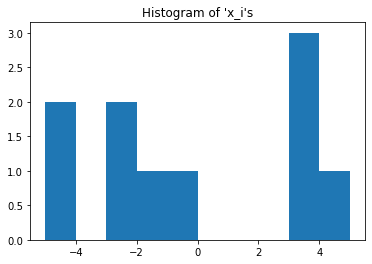

In [4]:
# Plot the uniform distribution of 'x_i's
draw_histogram([s[0] for s in samples],[x for x in range(-5,6)],title="Histogram of 'x_i's")

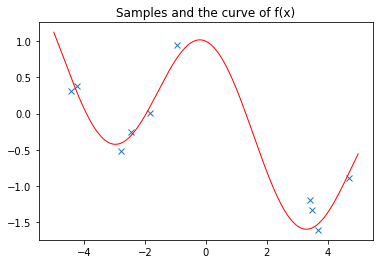

In [5]:
# plot sample dispersion and the curve of y_i = f(x_i)
plot_samples(samples)
x = np.linspace(-5,5,1000)
draw_lines(x,f(x),title="Samples and the curve of f(x)",show=True)

In [6]:
x_data = np.array([s[0] for s in samples]).reshape(-1,1)
y_data = np.array([s[1] for s in samples]).reshape(-1,1)
# =============================================================================
# OLS methods
from OLS import OLS

ols = OLS(1,1)
ols.fit(x_data,y_data)
print("[OLS] square error: ",ols.square_error(x_data,y_data))

[OLS] weight matrix:
 [[-0.1853079]]
[OLS] bias vector:
 [[-0.4393744]]
[OLS] square error:  0.23843450139392303


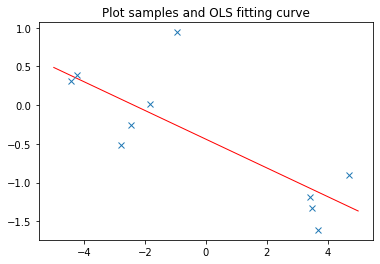

In [7]:
# draw the line of OLS
x = np.linspace(-5,5,1000).reshape(-1,1)
draw_lines(x,ols.predict(x))
plot_samples(samples,title="Plot samples and OLS fitting curve",show=True)

In [8]:
# =============================================================================
# GD methods
from GD import GD
gd = GD(1,1)
gd.fit(x_data,y_data)
print("[GD] square error: ",gd.square_error(x_data,y_data))

[GD] epoch:  0  loss:  0.8046124680362329
[GD] epoch:  10  loss:  0.26221766867629814
[GD] epoch:  20  loss:  0.24133790100953786
[GD] epoch:  30  loss:  0.23878894238270593
[GD] epoch:  40  loss:  0.2384777708129358
[GD] epoch:  50  loss:  0.2384397836346372
[GD] converge at epoch:  50
[GD] stop training.
[GD] weight matrix:
  [[-0.18528045]]
[GD] bias vector:
  [[-0.43730376]]
[GD] square error:  0.23843878176973035


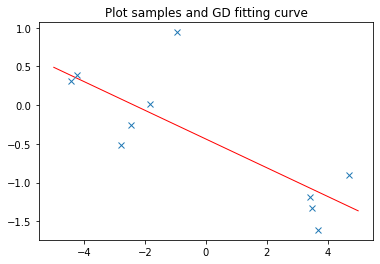

In [9]:
# draw the line of GD
x = np.linspace(-5,5,1000).reshape(-1,1)
draw_lines(x,gd.predict(x))
plot_samples(samples,title="Plot samples and GD fitting curve",show=True)

[OLS] square error for poly degree (1): 0.23843450
[OLS] square error for poly degree (2): 0.22723793
[OLS] square error for poly degree (3): 0.21892961
[OLS] square error for poly degree (4): 0.02038410
[OLS] square error for poly degree (5): 0.00398701
[OLS] square error for poly degree (6): 0.00397859
[OLS] square error for poly degree (7): 0.00225696
[OLS] square error for poly degree (8): 0.00010383


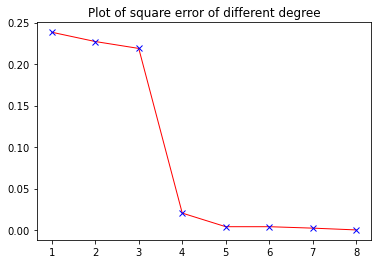

In [12]:
# Solve polynomial regression issues with minimum multiplication.
# =============================================================================
# OLS methods
from OLS import OLS
from utls import poly
error_of_different_degree = []
for i in range(1,9):
    n = i  # the degree of polynomial
    x_data_poly = poly(x_data,n)  # generate the polynomial data
    ols_poly = OLS(n,1)
    ols_poly.fit(x_data_poly,y_data,show_parameters=False)
    performance = ols_poly.square_error(x_data_poly,y_data)
    print("[OLS] square error for poly degree (%d): %.8f"%(i,performance))
    error_of_different_degree.append([i,performance])
draw_lines(np.array(error_of_different_degree)[:,0],np.array(error_of_different_degree)[:,1],title="Plot of square error of different degree",show=True,with_marker=True)

[OLS] square error for poly degree (14): 0.02038410


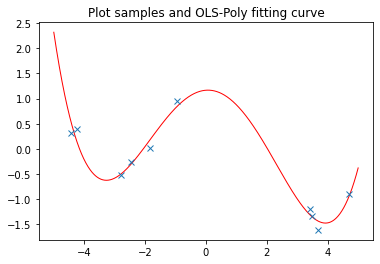

In [11]:

n = 4  # the degree of polynomial
x_data_poly = poly(x_data,n)  # generate the polynomial data
ols_poly = OLS(n,1)
ols_poly.fit(x_data_poly,y_data,show_parameters=False)
print("[OLS] square error for poly degree (%d): %.8f"%(i,ols_poly.square_error(x_data_poly,y_data)))
# draw the line of OLS for polynomial regression
x = np.linspace(-5,5,1000).reshape(-1,1)
x_poly = poly(x,n)
draw_lines(x,ols_poly.predict(x_poly))
plot_samples(samples,title="Plot samples and OLS-Poly fitting curve",show=True)